# **House grouping system**
### We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

In [21]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

### **Step 1:** Loading the dataset

In [2]:
# Load the dataset from https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv
california_housing_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
california_housing_df.to_csv("../data/raw/california_housing.csv")
california_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
# dataframe informatio
california_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Features selction
ca_housing_class_df = california_housing_df.drop(columns=["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"])
ca_housing_class_df.to_csv("../data/interim/housing_classification.csv")
ca_housing_class_df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [5]:
# Divide the dataset into train and test: X_train, X_test, y_train, y_test
# Split the data
X_train, X_test = train_test_split(ca_housing_class_df, test_size=0.2, random_state=42)

# Save the train and test dataframes
X_train.to_csv('../data/processed/X_train.csv', index = False)
X_test.to_csv('../data/processed/X_test.csv', index = False)

# Show the results
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [6]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


### **Step 2:** Build a K-Means

In [7]:
# Training the mode_kmeans
model_kmeans = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_kmeans.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [8]:
# Store the clusters in the train df
y_train = list(model_kmeans.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


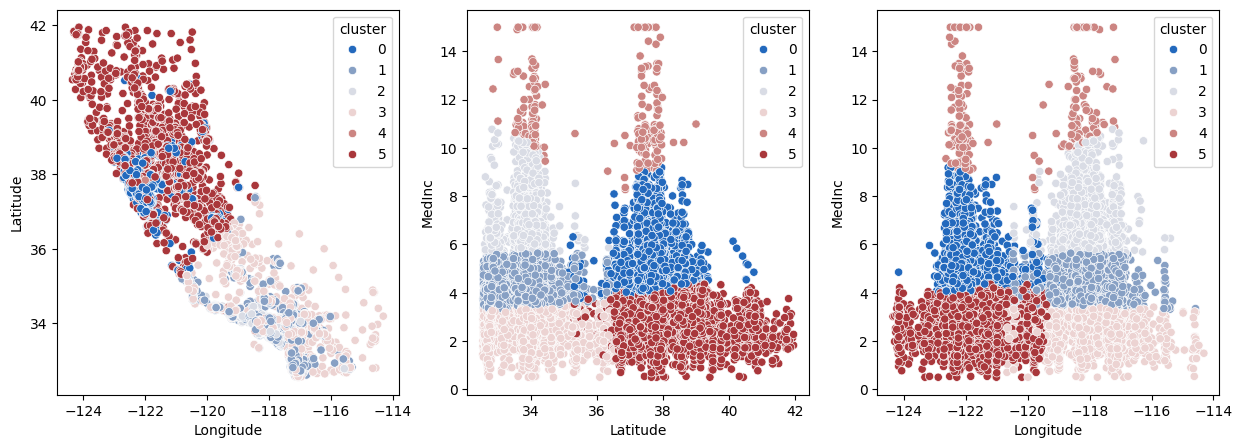

In [9]:
# Plotting the X_train

# Inicaialize the axis
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

# Create the plots
sns.scatterplot(ax = ax[0], data = X_train, x = 'Longitude', y = 'Latitude', hue = 'cluster', palette = 'vlag')
sns.scatterplot(ax = ax[1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette = 'vlag')
sns.scatterplot(ax = ax[2], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette = 'vlag')

#Show the plot
plt.show()

### **Step 3:** Predict with the test set

In [10]:
# Predicting the X_test
y_test = list(model_kmeans.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


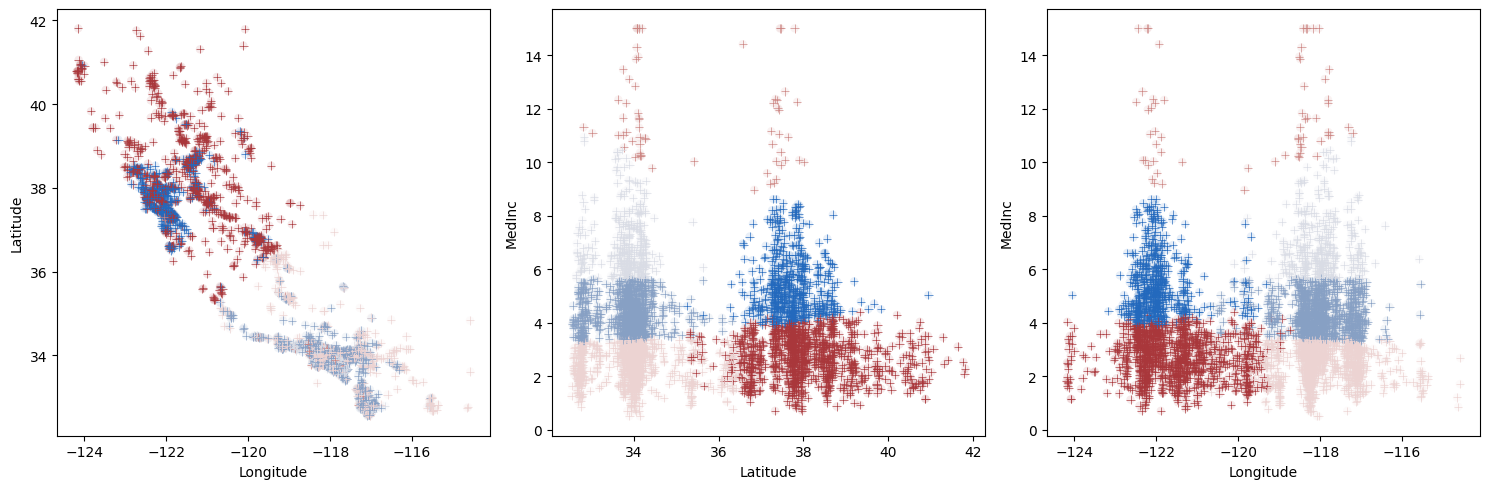

In [11]:
# Plotting the test

# Inicaialize the axis
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

# Create the plots
sns.scatterplot(ax = ax[0], data = X_test, x = 'Longitude', y = 'Latitude', hue = 'cluster', palette = 'vlag', alpha = 0.1)
sns.scatterplot(ax = ax[1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette = 'vlag', alpha = 0.1)
sns.scatterplot(ax = ax[2], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette = 'vlag', alpha = 0.1)

sns.scatterplot(ax = ax[0], data = X_test, x = 'Longitude', y = 'Latitude', hue = 'cluster', palette = 'vlag', marker = '+')
sns.scatterplot(ax = ax[1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette = 'vlag', marker = '+')
sns.scatterplot(ax = ax[2], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette = 'vlag', marker = '+')

plt.tight_layout()

for ax in ax:
    ax.legend([],[], frameon=False)

#Show the plot
plt.show()

The prediction is successful

### **Step 4:** Train a supervised classification model

In [12]:
# Separate the features and the target variable
y_train = X_train['cluster']
X_train = X_train.drop(['cluster'], axis = 1)
y_test = X_test['cluster']
X_test = X_test.drop(['cluster'], axis = 1)

In [14]:
# Train the model
model_DTC = DecisionTreeClassifier(random_state=42)
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

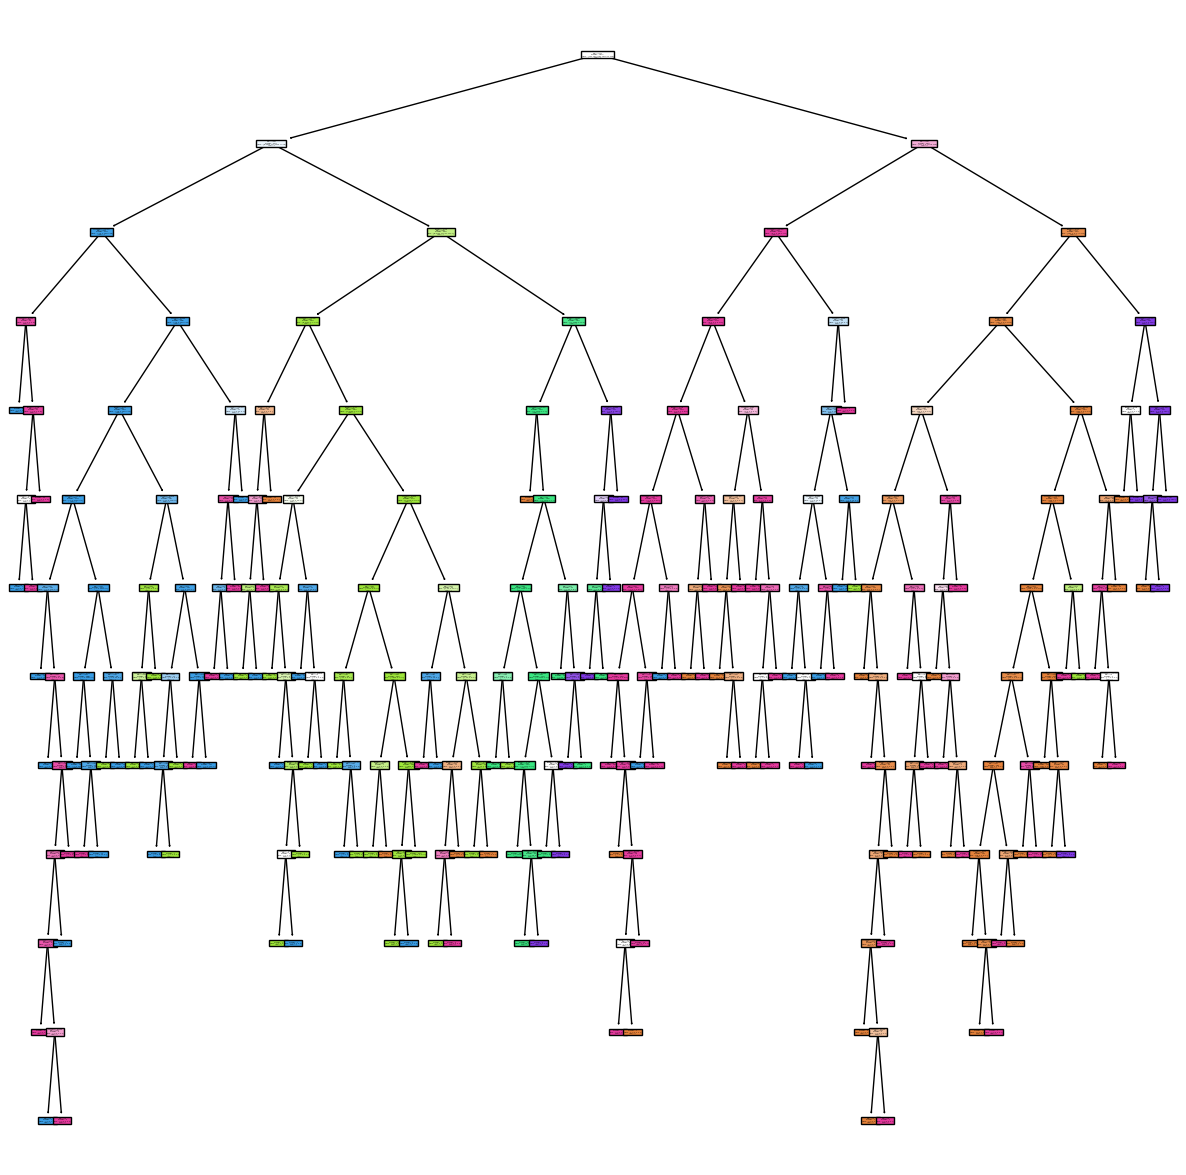

In [17]:
# Plot the tree
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_DTC, feature_names = list(X_train.columns), class_names = ['0', '1', '2', '3', '4', '5'], filled = True)

plt.show()

In [18]:
# Predcting the DTC model
y_pred = model_DTC.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1])

In [20]:
# Measuring the accuracy
accuracy_score(y_test, y_pred)

0.9951550387596899

### **Step 5:** Save the models

In [23]:
# Saving the models
dump(model_kmeans, open("../models/k-means_default_42.sav", "wb"))
dump(model_DTC, open("../models/decision_tree_classifier_default_42.sav", "wb"))